<a href="https://colab.research.google.com/github/Joseasd213/Gat-Gos/blob/main/Gat_i_gos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.5366 - loss: 0.6885 - val_accuracy: 0.5260 - val_loss: 0.6805
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6792 - loss: 0.6120 - val_accuracy: 0.7030 - val_loss: 0.5773
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.7725 - loss: 0.4868 - val_accuracy: 0.6940 - val_loss: 0.5743
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8080 - loss: 0.4194 - val_accuracy: 0.6930 - val_loss: 0.5825
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8644 - loss: 0.3238 - val_accuracy: 0.7180 - val_loss: 0.5995


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

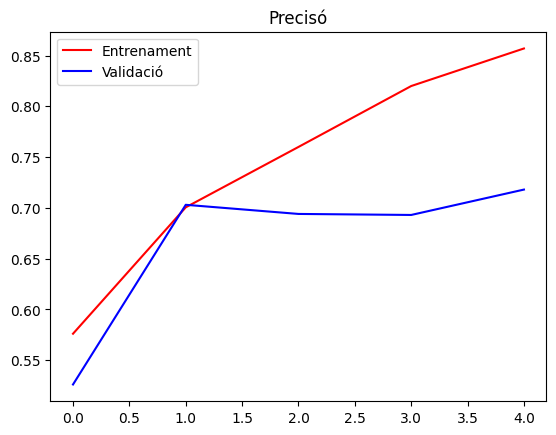

Saving catty (2).jpg to catty (2) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
✅ És un GAT 🐱 amb una confiança del 91.92%


<ipython-input-4-1232e55b1400>:114: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob = float(prediction[0])


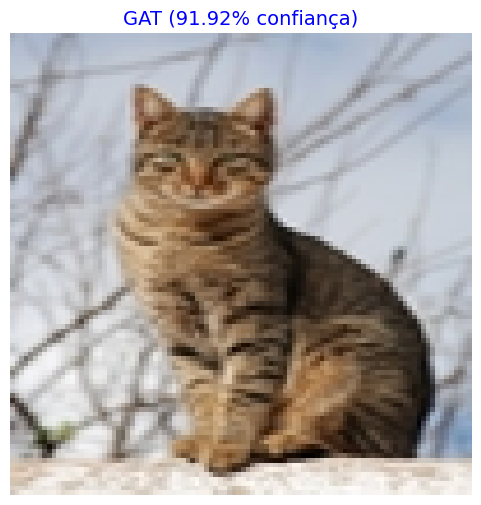

És correcte? (s/n): s
🎉 Bé! La predicció ha estat correcta.


In [4]:
# 📦 Instal·lar dependències (només si cal)
# No cal instal·lar res extra per aquest notebook

# 📦 Imports
import os
import pathlib
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from PIL import Image, UnidentifiedImageError
from google.colab import files

# 📥 Descarregar i preparar dades
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

base_dir = os.path.join(pathlib.Path(zip_path).parent, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 📊 Preparar generadors d’imatges
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=10,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=10,
    class_mode='binary'
)

# 🧠 Definir i entrenar el model
model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# 💾 Guardar el model
model_json = model.to_json()
with open("model_gats_gossos.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_gats_gossos.weights.h5")

# 📥 Descarregar fitxers
files.download("model_gats_gossos.json")
files.download("model_gats_gossos.weights.h5")

# 📈 Mostrar gràfica de precisió
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Entrenament')
plt.plot(epochs, val_acc, 'b', label='Validació')
plt.title('Precisó')
plt.legend()
plt.show()

# 📸 TEST de predicció manual en Colab (carregar imatge pròpia)
uploaded = files.upload()  # Puja una imatge des del teu ordinador

# Recuperar el nom del fitxer pujat
uploaded_filename = list(uploaded.keys())[0]

# 🔄 Carregar el model guardat
with open("model_gats_gossos.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_gats_gossos.weights.h5")
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])






# 📷 Preparar la imatge
try:
    image = Image.open(uploaded_filename).convert("RGB").resize((100, 100))
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 🔍 Fer predicció
    prediction = loaded_model.predict(img_array)
    prob = float(prediction[0])

    # Decidir el text a mostrar segons la predicció
    if prob > 0.5:
        prediccio = f"GOS 🐶 ({prob*100:.2f}% confiança)"
        print(f"✅ És un GOS 🐶 amb una confiança del {prob*100:.2f}%")
    else:
        prediccio = f"GAT ({(1-prob)*100:.2f}% confiança)"
        print(f"✅ És un GAT 🐱 amb una confiança del {(1-prob)*100:.2f}%")

    # 📸 Visualitzar la imatge amb el resultat de la predicció a sobre
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(prediccio, fontsize=14, color='blue', loc='center')
    plt.show()

    # 📢 Confirmació de l'usuari
    resposta = input("És correcte? (s/n): ").strip().lower()

    if resposta == 'n':
        correcte = input("Quina és la resposta correcta? (gat/gos): ").strip().lower()
        if correcte in ['gat', 'gos']:

            # 📂 Guardar imatge a la carpeta corresponent
            os.makedirs(f"correccions/{correcte}", exist_ok=True)
            nova_ruta = f"correccions/{correcte}/{uploaded_filename}"
            os.rename(uploaded_filename, nova_ruta)
            print(f"✅ Imatge desada a {nova_ruta} per a futures correccions.")
        else:
            print("❌ Valor no vàlid. S'ha ignorat la imatge.")
    else:
        print("🎉 Bé! La predicció ha estat correcta.")

except UnidentifiedImageError:
    print("❌ No s'ha pogut llegir la imatge. Si us plau, puja un arxiu .jpg o .png vàlid.")

